In [1]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np
import xarray as xr

from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature 
# When data are defined in lat/lon coordinate system, PlateCarree()
# is the appropriate choice:

## More plotting help

* [matplotlib gallery:](https://matplotlib.org/gallery.html#misc)
* [colormaps:](https://matplotlib.org/examples/color/colormaps_reference.html)
* [cartopy:](http://scitools.org.uk/cartopy/docs/v0.14/index.html)
* [geoviews:](http://geo.holoviews.org/Gridded_Datasets_I.html)

In [2]:
# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
data_crs = ccrs.PlateCarree()   # since our data is on a rectangular lon,lat grid

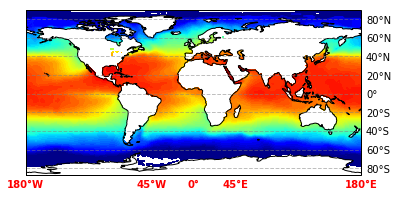

In [12]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree(), cmap = "jet")
gl = ax.gridlines(crs=data_crs, draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.coastlines()
plt.show()

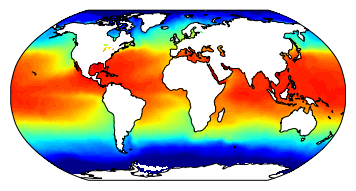

In [13]:
plt.figure()
ax2 = plt.axes(projection=ccrs.Robinson())
plt.contourf(lons, lats, sst, 60, transform=data_crs, cmap = "jet")
ax2.coastlines()

plt.show()

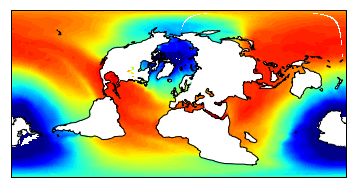

-179.5

In [14]:
# A rotated pole projection again...
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# ...but now using the transform argument
#ax.contourf(lons, lats, sst, 60, cmap = "jet")
#clons = np.concatenate(lons,[lons[0]])
ax.contourf(lons, lats, sst, 60, transform=data_crs, cmap = "jet")
plt.show()
lons[0]

In [15]:
airtemps = xr.tutorial.load_dataset('air_temperature')

/home2/biasutti/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home2/biasutti/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home2/biasutti/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home2/biasutti/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloadin

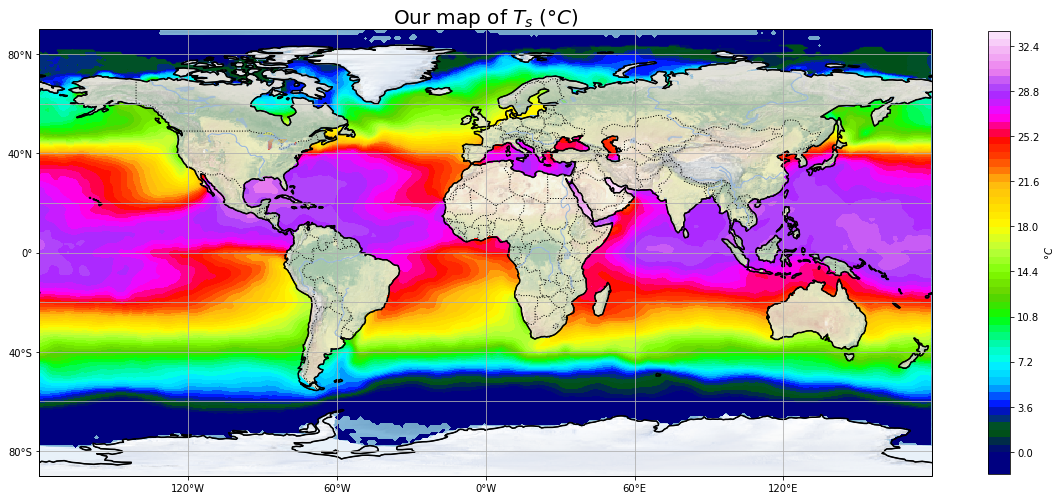

In [16]:
plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
im = ax.contourf(lons, lats, sst, 60, vmin = 0, vmax = 34, transform=data_crs, cmap = "gist_ncar")
cb = plt.colorbar(im, orientation='vertical', shrink = 0.68, label=r'$\degree C$')
ax.coastlines(linewidth=1.5)
ax.stock_img()

ax.set_xticks([-120, -60 ,0, 60, 120], crs=ccrs.PlateCarree())
ax.set_yticks([-80,-40, 0, 40, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines()
ax.add_feature(cfeature.LAND, alpha=1.0)
ax.add_feature(cfeature.OCEAN, alpha=0.3)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
plt.title(r'Our map of $T_s$ ($\degree C$)', fontsize=20)
plt.show()